In [1]:
import urllib
from bs4 import BeautifulSoup
import dill as pickle
import sys
%matplotlib inline
sys.setrecursionlimit(100000)

In [2]:
#website = "nips2017"
website = "nips2019"
#website = "icml2017"

In [3]:
if True:
    if website=='nips2017':
        url = "https://nips.cc/Conferences/2017/AcceptedPapersInitial"
    elif website=='icml2017':
        url = "https://2017.icml.cc/Conferences/2017/AcceptedPapers"
    elif website=='nips2019':
        url = "https://nips.cc/Conferences/2019/AcceptedPapersInitial"
    html = urllib.request.urlopen(url)
    soup = BeautifulSoup(html, "lxml")
    with open(website+'.pickle', mode='wb') as f:
        pickle.dump(soup, f)
else:
    with open(website+'.pickle', mode='rb') as f:
        soup = pickle.load(f)

In [92]:
if website=='nips2017' or website=='nips2019':
    titles = soup.find_all('b')
elif website=='icml2017':
    titles = soup.find_all('strong')
else:
    NotImplementedError()
nb_tot_papers = len(titles) - 3
titles

[<b>NeurIPS <span>| 2019 </span></b>,
 <b>   Calls 2019</b>,
 <b>   Author Resources</b>,
 <b>Multimodal Model-Agnostic Meta-Learning via Task-Aware Modulation</b>,
 <b>ViLBERT: Pretraining Task-Agnostic Visiolinguistic Representations for Vision-and-Language Tasks</b>,
 <b>Stochastic Shared Embeddings: Data-driven Regularization of Embedding Layers</b>,
 <b>Unsupervised Scale-consistent Depth and Ego-motion Learning from Monocular Video</b>,
 <b>Zero-shot Learning via Simultaneous Generating and Learning</b>,
 <b>Ask not what AI can do for you, but what AI should do: Towards a framework of task delegability</b>,
 <b>Stand-Alone Self-Attention in Vision Models</b>,
 <b>High Fidelity Video Prediction with Large Neural Nets</b>,
 <b>Unsupervised learning of object structure and dynamics from videos</b>,
 <b>TensorPipe: Easy Scaling with Micro-Batch Pipeline Parallelism</b>,
 <b>Meta-Learning with Implicit Gradients</b>,
 <b>Adversarial Examples Are Not Bugs, They Are Features</b>,
 <b>So

In [93]:
print(nb_tot_papers)

1429


In [94]:
import re

#pattern = r'\([\w\s]+\)'
pattern = r'\([\w\s\W]+\)'
if website=='nips2017' or website=='nips2019':
    authors = soup.find_all('i')
elif website=='icml2017':
    authors = soup.find_all('em')
    
institutes = []
institutes_in_paper = []
for author in authors:
    for content in author.contents:
        items = re.findall(pattern, content)
        print(items)
        [institutes.append(item[1:-1].lower()) for item in items]
        institutes_in_paper.append(items)
#institutes = set(sum(institutes, []))
#institutes = set(institutes)
institutes.sort()
#institutes

['(University of Michigan) · Shao-Hua Sun (University of Southern California) · Hexiang Hu (University of Southern California) · Joseph J Lim (University of Southern California)']
['(Georgia Tech) · Dhruv Batra (Georgia Tech / Facebook AI Research (FAIR)) · Devi Parikh (Georgia Tech / Facebook AI Research (FAIR)) · Stefan Lee (Georgia Institute of Technology)']
['(University of California, Davis) · Shuqing Li (University of California, Davis) · Cho-Jui Hsieh (UCLA) · James Sharpnack (UC Davis)']
['(The University of Adelaide) · Zhichao Li (Tusimple) · Naiyan Wang (Hong Kong University of Science and Technology) · Huangying Zhan (The University of Adelaide) · Chunhua Shen (University of Adelaide) · Ming-Ming Cheng (Nankai University) · Ian Reid (University of Adelaide)']
['(Seoul National University) · Beomhee Lee (Seoul National University)']
['(University of Colorado Boulder) · Chenhao Tan (University of Colorado Boulder)']
['(Google) · Prajit Ramachandran (Google Brain) · Ashish Vasw

In [95]:
pattern = r'\([\w\s\W]+\)'
#pattern = r'\([.*]\)'

repatter = re.compile(pattern)
repatter.findall('(Preferred Networks, Inc.)'),repatter.findall('(Preferred Networks)'),repatter.findall('(Preferred Networks, Inc., Inc.)')

(['(Preferred Networks, Inc.)'],
 ['(Preferred Networks)'],
 ['(Preferred Networks, Inc., Inc.)'])

In [96]:
print(set(institutes))

{'carnegie mellon university) · travis dick (carnegie mellon university) · ritesh noothigattu (carnegie mellon university) · ariel d procaccia (carnegie mellon university', 'indiana university) · lei jiang (indiana university bloomington', 'university of bergen) · robert ganian (tu wien) · iyad kanj (depaul university, chicago) · stefan szeider (vienna university of technology', 'simon fraser university) · zhijian liu (mit) · song han (mit', 'zhejiang university) · yang wang (huazhong university of science and technology) · zheng yang (fabu) · deng cai (zju', 'gipsa lab) · romain couillet (centralsupélec) · nicolas tremblay (cnrs', 'yale university) · ehsan kazemi (yale) · moran feldman (open university of israel) · andreas krause (eth zurich) · amin karbasi (yale', 'the university of sydney) · jingwei zhang (hong kong university of science and technology & university of sydney) · dacheng tao (university of sydney', 'cornell university) · felix wu (cornell university) · kilian weinberg

In [97]:
len(list(set(institutes)))

1397

In [98]:
for f in list(set(institutes)):
    print(f)

carnegie mellon university) · travis dick (carnegie mellon university) · ritesh noothigattu (carnegie mellon university) · ariel d procaccia (carnegie mellon university
indiana university) · lei jiang (indiana university bloomington
university of bergen) · robert ganian (tu wien) · iyad kanj (depaul university, chicago) · stefan szeider (vienna university of technology
simon fraser university) · zhijian liu (mit) · song han (mit
zhejiang university) · yang wang (huazhong university of science and technology) · zheng yang (fabu) · deng cai (zju
gipsa lab) · romain couillet (centralsupélec) · nicolas tremblay (cnrs
yale university) · ehsan kazemi (yale) · moran feldman (open university of israel) · andreas krause (eth zurich) · amin karbasi (yale
the university of sydney) · jingwei zhang (hong kong university of science and technology & university of sydney) · dacheng tao (university of sydney
cornell university) · felix wu (cornell university) · kilian weinberger (cornell university) · 

university of tübingen) · francesco tudisco (university of strathclyde) · matthias hein (university of tübingen
indian institute of science) · aditya gopalan (indian institute of science
deepmind) · shayegan omidshafiei (deepmind) · karl tuyls (deepmind) · julien perolat (deepmind) · michal valko (deepmind paris and inria lille - nord europe) · georgios piliouras (singapore university of technology and design) · remi munos (deepmind
jhu applied physics laboratory) · will levine (rice university
stanford university) · tengyang xie (university of illinois at urbana-champaign) · nan jiang (university of illinois at urbana-champaign) · yu-xiang wang (uc santa barbara
stanford university) · panupong pasupat (stanford university) · kartik  chandra (stanford university) · mina lee (stanford university) · oded padon (stanford university) · alex aiken (stanford university) · percy liang (stanford university
massachusetts institute of technology) · shaileshh bojja venkatakrishnan (massachusetts 

In [99]:
print(nb_tot_papers)

1429


In [100]:
from collections import Counter

counter = Counter(institutes)
for word, cnt in counter.most_common():
    print(word, cnt)

purdue university) · jean honorio (purdue university 3
google 3
eth zurich) · aurelien lucchi (eth zurich 2
gatsby unit, ucl) · maneesh sahani (gatsby unit, ucl 2
university of amsterdam) · max welling (university of amsterdam / qualcomm ai research 2
university of toronto 2
uc berkeley) · stephen tu (uc berkeley) · benjamin recht (uc berkeley 2
epfl) · soroosh shafieezadeh abadeh (epfl) · man-chung yue (the hong kong polytechnic university) · daniel kuhn (epfl) · wolfram wiesemann (imperial college 2
penn state university) · jordan awan (penn state university 2
carnegie mellon university) · chun kai ling (carnegie mellon university) · fei fang (carnegie mellon university) · tuomas sandholm (carnegie mellon university 2
ucla) · quanquan gu (ucla 2
duke university) · jon schneider (google research) · balasubramanian sivan (google research 2
deepmind) · andrás györgy (deepmind) · csaba szepesvari (deepmind/university of alberta 2
amazon 2
university of texas at austin) · hsiang-fu yu (am

new york university) · lingjing wang (new york university) · xiang li (new york university) · yi fang (new york university 1
university of illinois at urbana champaign) · olgica milenkovic (university of illinois at urbana-champaign) · abhishek agarwal (university of illinois at urbana champaign 1
the university of tokyo) · masato okada (the university of tokyo 1
university of chinese academy of sciences) · fang wan (university of chinese academy of sciences) · chang liu (university of chinese academy of sciences) · rongrong ji (xiamen university, china) · qixiang ye (university of chinese academy of sciences, china 1
deepmind) · daniel zoran (deepmind) · mike chrzanowski (deepmind) · daan wierstra (deepmind technologies) · danilo jimenez rezende (google deepmind 1
mila, university of montreal) · pedro o. pinheiro (element ai) · negar rostamzadeh (elemenet ai) · chris pal (mila, polytechnique montréal, element ai) · sungjin ahn (rutgers university 1
university of southampton) · jonatho

uc berkeley) · david woodruff (carnegie mellon university) · richard zhang (uc berkeley 1
google deepmind) · sebastian ruder (deepmind) · lingpeng kong (deepmind) · dani yogatama (deepmind 1
ensae paristech) · marco cuturi (google and crest/ensae 1
microsoft research) · chris quirk (microsoft research 1
tencent) · tianyi zhou (university of washington, seattle) · yali du (university of technology sydney) · lei han (rutgers university) · zhengyou zhang ( 1
oak ridge national laboratory) · jiaxin zhang (oak ridge national laboratory) · jacob hinkle (oak ridge national lab 1
mit) · max kleiman-weiner (harvard) · david parkes (harvard university) · josh tenenbaum (mit 1
carnegie mellon university) · kangcheng hou (zhejiang university) · ruslan salakhutdinov (carnegie mellon university) · barnabas poczos (carnegie mellon university) · ruosong wang (carnegie mellon university) · keyulu xu (mit 1
facebook ai research) · laurens van der maaten (facebook) · justin johnson (facebook ai research)

university of toronto) · saminul haque (university of toronto) · cem anil (university of toronto; vector institute) · james lucas (university of toronto) · roger grosse (university of toronto) · joern-henrik jacobsen (vector institute 1
google) · ann yuan (google) · martin wattenberg (google) · fernanda b viegas (google) · andy coenen (google) · adam pearce (google) · been kim (google 1
boston university) · praveen venkatesh (carnegie mellon university) · bobak nazer (boston university) · venkatesh saligrama (boston university 1
universith of michigan) · ambuj tewari (university of michigan 1
ieor department, columbia university) · vineet goyal (columbia university 1
telecom paristech) · umut simsekli (institut polytechnique de paris) · mert gurbuzbalaban (rutgers) · gaël richard (télécom paristech 1
bitdefender) · iulia duta (bitdefender) · marius leordeanu (institute of mathematics of the romanian academy 1
national university of singapore) · maximilian nickel (facebook ai research) 

université de montréal) · corey lynch (google brain) · yoshua bengio (mila) · aaron van den oord (google deepmind) · sergey levine (uc berkeley) · pierre sermanet (google brain 1
amazon) · daniel rothchild (uc berkeley) · md enayat ullah (johns hopkins university) · vladimir braverman (johns hopkins university) · ion stoica (uc berkeley) · raman arora (johns hopkins university 1
mit-ibm watson ai lab) · karthikeyan shanmugam (ibm research, ny) · amin jaber (purdue university, usa) · elias bareinboim (purdue 1
nvidia) · ming-yu liu (nvidia research) · andrew tao (nvidia corporation) · guilin liu (nvidia) · bryan catanzaro (nvidia) · jan kautz (nvidia 1
sapienza university of rome) · anand rajagopalan (google) · claudio gentile (google research 1
u of toronto) · david duvenaud (university of toronto 1
imperial college london) · francois-xavier briol (university of cambridge) · andrew duncan (imperial college london) · mark girolami (university of cambridge) · lester mackey (microsoft res

mit) · mert demirer (mit) · greg lewis (microsoft research) · vasilis syrgkanis (microsoft research 1
university of alberta) · martha white (university of alberta 1
texas a&m university) · tianlong chen (texas a&m university) · zhangyang wang (tamu) · yang shen (texas a&m university 1
ku leuven, belgium) · eugene belilovsky (university of montreal) · tinne tuytelaars (ku leuven) · laurent charlin (mila / u.montreal) · massimo caccia (mila) · min lin (mila) · lucas page-caccia (mcgill university 1
new york university) · samuel bowman (new york university) · kyunghyun cho (nyu 1
duke university) · sham kakade (university of washington) · rahul kidambi (university of washington) · praneeth netrapalli (microsoft research 1
the alan turing institute) · theodoros damoulas (university of warwick        the alan turing institute) · kangrui wang (the alan turing institute) · mark girolami (imperial college london 1
deepmind) · melissa tan (deepmind) · ryan faulkner (deepmind) · steven hansen (d

In [101]:
def count_paper(institute_names, institutes_in_paper, first=False):
    nb_papers = {}
    [nb_papers.update({key:0}) for key, value in institute_names.items()]

    for key, value in institute_names.items():
        for paper in institutes_in_paper:
            try:
                for institute in paper:
                    
                    found = False
                    
                    if first:
                        found = found or re.search(value[0], institute.lower()) 
                    else:
                        for v in value:
                            found = found or re.search(v, institute.lower()) 
    #                        found = found or v in institute.lower()

                    if found:
                        nb_papers[key] += 1
                        raise Exception
                
            except Exception:
                pass
    return sorted(nb_papers.items(), key=lambda x: x[1], reverse=True)

In [102]:
institute_names = {}
[institute_names.update({word:[word]}) for word, cnt in counter.most_common()]

#institute_names[u'carnegie mellon university'] += institute_names[u'cmu']
#institute_names[u'adobe research'] += institute_names[u'adobe research']
#del institute_names[u'cmu']
#del institute_names[u'adobe research']
#institute_names

count_paper(institute_names, institutes_in_paper)

[('google', 143),
 ('mit', 113),
 ('stanford university', 76),
 ('microsoft research', 66),
 ('uc berkeley', 52),
 ('columbia university', 42),
 ('tsinghua university', 35),
 ('facebook ai research', 32),
 ('nyu', 29),
 ('university of toronto', 27),
 ('amazon', 22),
 ('riken', 20),
 ('harvard university', 20),
 ('university of cambridge', 18),
 ('new york university', 16),
 ('vector institute', 11),
 ('university of chicago', 7),
 ('ntt', 7),
 ('university of massachusetts, amherst', 6),
 ('institute of automation, chinese academy of sciences', 6),
 ('national institute of advanced industrial science and technology', 4),
 ('nec corporation,      university of tokyo', 3),
 ('leiden university', 3),
 ('netflix', 2),
 ('ben-gurion university of the negev', 2),
 ('rochester institute of technology', 2),
 ('osaka university', 2),
 ('universidad de chile', 1),
 ('laboratoire de mathematiques d’orsay, univ. paris-sud,', 1),
 ('florida state university', 1),
 ('wuhan university', 1),
 ('depar

In [103]:
institute_names = {
    "Carnegie Mellon University":["carnegie mellon university", "cmu"],
    "Google":["google", "deepmind", "google deepmind", "google brain", "google research"],
    "MIT":["mit", "massachusetts institute of technology"],
    "Microsoft":["microsoft research"],
    "Stanford":["stanford"],
    "UC Berkeley":["uc berkeley", "ucb"],
    "Oxford":['oxford'],
}

nb_papers = count_paper(institute_names, institutes_in_paper)
nb_papers

[('Google', 165),
 ('MIT', 118),
 ('Stanford', 81),
 ('Carnegie Mellon University', 81),
 ('Microsoft', 66),
 ('UC Berkeley', 52),
 ('Oxford', 41)]

In [104]:
institute_names = {
    "JPN":['tokyo','waseda','hokkaido','osaka','nankai','nec','ntt','riken', 'preferred', 'keio', 'aist', 'toyota', 'mitsubishi', 'yahoo', 'kyoto', 'pfn', 'institute of statistical mathematics'],
    "Carnegie Mellon University":["carnegie mellon university", "cmu"],
    "Google":["google", "deepmind"],
    "Stanford":["stanford", "stanford university"],
    "MIT":["mit", "massachusetts institute of technology"],
    "UC Berkeley":["uc berkeley", "ucb"],
    "Microsoft":["microsoft"],
    "Duke University":["duke"],
    "Oxford":['oxford'],
    "Princeton University":['princeton'],
    "ETH Zurich":['eth', 'zurich'],
    "University of Michigan":['michigan'],
    "Columbia Michigan":['columbia'],
    "University of Cambridge":['cambridge'],
    "Harvard University":['harvard'],
    "EPFL":['epfl'],
    "INRIA":['inria'],
    "Georgia Tech":['georgia'],
    "Tsinghua University":['tsinghua'],
    "UCL":['ucl'],
    "University of Toronto":['toronto'],
    "facebook":['facebook'],
    "UIUC":['uiuc'],
    "University of Texas":['texas'],
    "University of Minnesota":['minnesota'],
    "Peking University":['peking'],
    "NVIDIA":['nvidia'],
    "UBER":['uber'],
    "twitter":['twitter'],
    "Amazon":['amazon'],
}
nb_papers = count_paper(institute_names, institutes_in_paper)
nb_papers

[('Google', 165),
 ('MIT', 118),
 ('Carnegie Mellon University', 81),
 ('Stanford', 81),
 ('Microsoft', 73),
 ('JPN', 54),
 ('UC Berkeley', 52),
 ('Princeton University', 51),
 ('Columbia Michigan', 48),
 ('ETH Zurich', 46),
 ('Oxford', 41),
 ('facebook', 39),
 ('Tsinghua University', 37),
 ('UCL', 37),
 ('INRIA', 36),
 ('University of Texas', 36),
 ('Georgia Tech', 31),
 ('University of Toronto', 27),
 ('Peking University', 27),
 ('EPFL', 25),
 ('Harvard University', 23),
 ('University of Cambridge', 23),
 ('Duke University', 22),
 ('Amazon', 22),
 ('UBER', 16),
 ('University of Michigan', 14),
 ('UIUC', 11),
 ('University of Minnesota', 10),
 ('NVIDIA', 9),
 ('twitter', 2)]

In [105]:
institute_names_jpn = {}
for f in institute_names['JPN']:
    institute_names_jpn.update({f:[f]})

count_paper(institute_names_jpn, institutes_in_paper)

[('riken', 20),
 ('tokyo', 16),
 ('nec', 9),
 ('ntt', 7),
 ('kyoto', 7),
 ('aist', 7),
 ('toyota', 5),
 ('preferred', 4),
 ('institute of statistical mathematics', 2),
 ('keio', 2),
 ('osaka', 2),
 ('nankai', 1),
 ('yahoo', 1),
 ('mitsubishi', 1),
 ('pfn', 0),
 ('hokkaido', 0),
 ('waseda', 0)]

In [107]:
import numpy as np
nb_papers.append(('rest',nb_tot_papers-np.array([i[1] for i in nb_papers]).sum()))

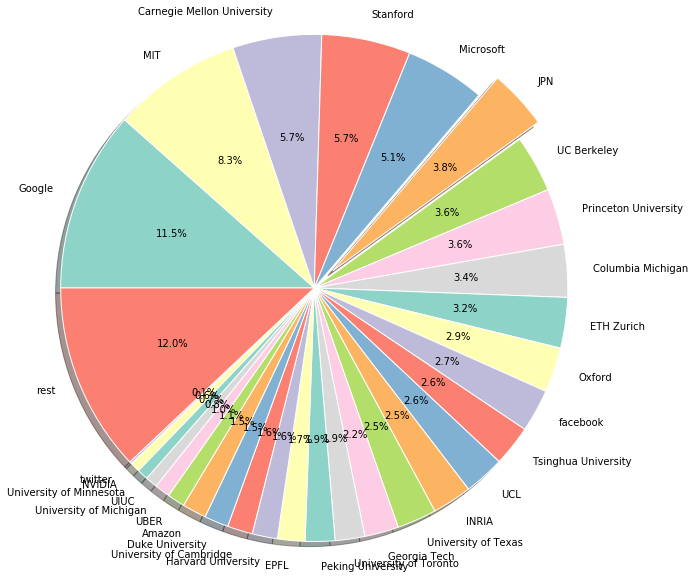

In [114]:
import matplotlib.pyplot as plt
import seaborn
from matplotlib import cm

institute_names = {
    "JPN":['tokyo','waseda','hokkaido','osaka','nankai','nec','ntt','riken', 'preferred', 'keio', 'aist', 'toyota', 'mitsubishi', 'yahoo', 'kyoto', 'pfn', 'institute of statistical mathematics'],
    "Carnegie Mellon University":["carnegie mellon university", "cmu"],
    "Google":["google", "deepmind"],
    "Stanford":["stanford", "stanford university"],
    "MIT":["mit", "massachusetts institute of technology"],
    "UC Berkeley":["uc berkeley", "ucb"],
    "Microsoft":["microsoft"],
    "Duke University":["duke"],
    "Oxford":['oxford'],
    "Princeton University":['princeton'],
    "ETH Zurich":['eth', 'zurich'],
    "University of Michigan":['michigan'],
    "Columbia Michigan":['columbia'],
    "University of Cambridge":['cambridge'],
    "Harvard University":['harvard'],
    "EPFL":['epfl'],
    "INRIA":['inria'],
    "Georgia Tech":['georgia'],
    "Tsinghua University":['tsinghua'],
    "UCL":['ucl'],
    "University of Toronto":['toronto'],
    "facebook":['facebook'],
    "UIUC":['uiuc'],
    "University of Texas":['texas'],
    "University of Minnesota":['minnesota'],
    "Peking University":['peking'],
    "NVIDIA":['nvidia'],
    "UBER":['uber'],
    "twitter":['twitter'],
    "Amazon":['amazon'],
}

nb_papers = count_paper(institute_names, institutes_in_paper, first=False)
nb_papers.append(('rest',nb_tot_papers-np.array([i[1] for i in nb_papers]).sum()))

cs=cm.Set3(np.arange(9))

plt.figure(figsize=(10,10))
 
# Data to plot
labels = [i[0] for i in nb_papers]
sizes = [i[1] for i in nb_papers]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = [0]*len(nb_papers)

for i,x in enumerate(nb_papers):
    if x[0]=='Google' or x[0]=='Google' or x[0]=='Carnegie Mellon University' or x[0]=='MIT' or x[0]=='Microsoft' or x[0]=='Stanford' or x[0]=='UCBerkeley':
        explode[i]=0.
    if x[0]=='JPN':
        explode[i]=0.1
        
plt.pie(
    sizes, 
    explode=explode, 
    labels=labels, 
    colors=cs,
    startangle=180,
    counterclock=False, 
    wedgeprops={'linewidth': 1, 'edgecolor':"white"},
    autopct='%1.1f%%',
    shadow=True
)

plt.axis('equal')
#plt.title('NIPS 2019 paper')
plt.savefig(website+'_co.png')
plt.show()

In [109]:
institute_names = {
    "UCLA":['ucla'],
    "IBM":['ibm'],
    "Adobe":['adobe'],
    "Intel":['intel'],
    "Nvidia":['nvidia'],
    "OpenAI":['openai'],
    "Amazon":['amazon'],
    "Max Planck Institute":['planck'],
    "NTT":['ntt'],
    "NEC":['nec'],
    "TTIC":['toyota technological institute at chicago'],
    "Uber":['uber'],
    "Riken":['riken'],
    "Twitter":['twitter'],
    "Apple":['apple'],
    "JPN University":['tokyo','waseda','hokkaido','osaka','nankai', ' tokyo metropolitan university'],
}

count_paper(institute_names, institutes_in_paper)

[('Intel', 41),
 ('IBM', 36),
 ('UCLA', 27),
 ('Amazon', 22),
 ('Riken', 20),
 ('JPN University', 18),
 ('Uber', 16),
 ('Max Planck Institute', 14),
 ('Nvidia', 9),
 ('NEC', 9),
 ('NTT', 7),
 ('Adobe', 6),
 ('Apple', 3),
 ('OpenAI', 3),
 ('TTIC', 3),
 ('Twitter', 2)]

# First

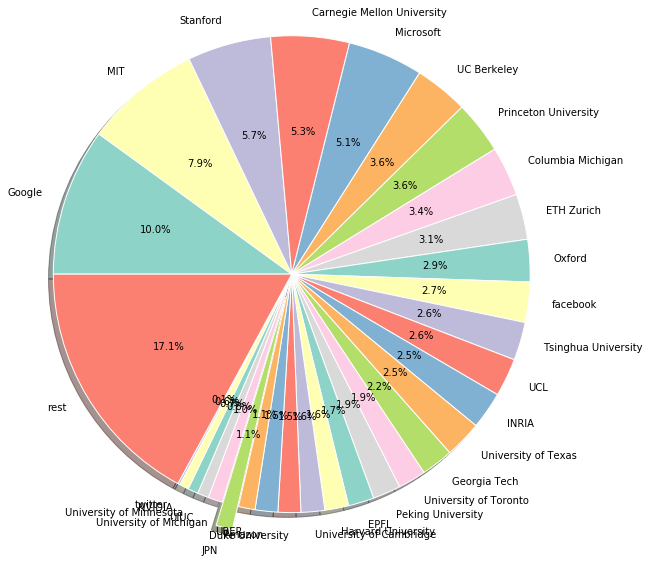

In [115]:
import matplotlib.pyplot as plt
import seaborn
from matplotlib import cm

institute_names = {
    "JPN":['tokyo','waseda','hokkaido','osaka','nankai','nec','ntt','riken', 'preferred', 'keio', 'aist', 'toyota', 'mitsubishi', 'yahoo', 'kyoto', 'pfn', 'institute of statistical mathematics'],
    "Carnegie Mellon University":["carnegie mellon university", "cmu"],
    "Google":["google", "deepmind"],
    "Stanford":["stanford", "stanford university"],
    "MIT":["mit", "massachusetts institute of technology"],
    "UC Berkeley":["uc berkeley", "ucb"],
    "Microsoft":["microsoft"],
    "Duke University":["duke"],
    "Oxford":['oxford'],
    "Princeton University":['princeton'],
    "ETH Zurich":['eth', 'zurich'],
    "University of Michigan":['michigan'],
    "Columbia Michigan":['columbia'],
    "University of Cambridge":['cambridge'],
    "Harvard University":['harvard'],
    "EPFL":['epfl'],
    "INRIA":['inria'],
    "Georgia Tech":['georgia'],
    "Tsinghua University":['tsinghua'],
    "UCL":['ucl'],
    "University of Toronto":['toronto'],
    "facebook":['facebook'],
    "UIUC":['uiuc'],
    "University of Texas":['texas'],
    "University of Minnesota":['minnesota'],
    "Peking University":['peking'],
    "NVIDIA":['nvidia'],
    "UBER":['uber'],
    "twitter":['twitter'],
    "Amazon":['amazon'],
}

nb_papers = count_paper(institute_names, institutes_in_paper, first=True)
nb_papers.append(('rest',nb_tot_papers-np.array([i[1] for i in nb_papers]).sum()))

cs=cm.Set3(np.arange(9))

plt.figure(figsize=(10,10))
 
# Data to plot
labels = [i[0] for i in nb_papers]
sizes = [i[1] for i in nb_papers]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = [0]*len(nb_papers)

for i,x in enumerate(nb_papers):
    if x[0]=='Google' or x[0]=='Google' or x[0]=='Carnegie Mellon University' or x[0]=='MIT' or x[0]=='Microsoft' or x[0]=='Stanford' or x[0]=='UCBerkeley':
        explode[i]=0.
    if x[0]=='JPN':
        explode[i]=0.1

plt.pie(
    sizes, 
    explode=explode, 
    labels=labels, 
    colors=cs,
    startangle=180,
    counterclock=False, 
    wedgeprops={'linewidth': 1, 'edgecolor':"white"},
    autopct='%1.1f%%',
    shadow=True
)

plt.axis('equal')
#plt.title('NIPS 2019 paper')
plt.savefig(website+'_first.png')
plt.show()